# **Data Loading**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(style='white', color_codes=True)

In [2]:
dataset = pd.read_csv('talking_data.csv')
dataset.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


# **EDA**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [4]:
miss_val = dataset.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [5]:
dataset = dataset.drop(columns=['attributed_time'])

In [6]:
print(dataset.nunique())

ip               34857
app                161
device             100
os                 130
channel            161
click_time       80350
is_attributed        2
dtype: int64


In [7]:
dataset['app'].unique

<bound method Series.unique of 0        12
1        25
2        12
3        13
4        12
         ..
99995    11
99996     9
99997     3
99998    15
99999    14
Name: app, Length: 100000, dtype: int64>

**checking for data balance**

In [8]:
dataset['is_attributed'].value_counts()
#Note: dataset is not balanced. SMOTE might be necessary after checking the accuracy

0    99773
1      227
Name: is_attributed, dtype: int64

**plot**

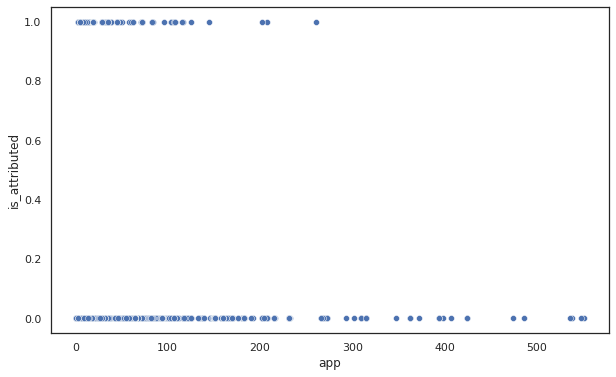

In [9]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x='app', y='is_attributed')

Text(0, 0.5, 'ip')

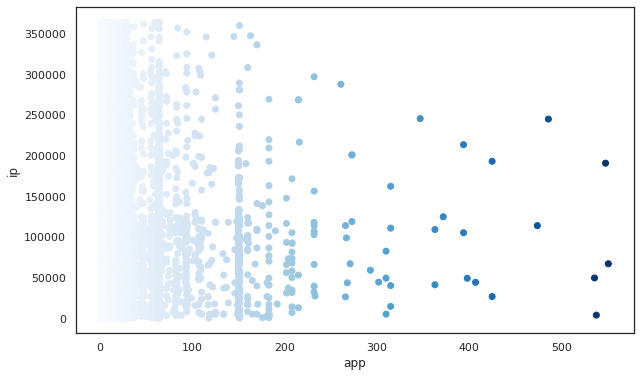

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['app'], y=dataset['ip'], c=dataset['app'], cmap='Blues')

plt.xlabel('app')
plt.ylabel('ip')

**encoding**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [12]:
import datetime
dataset['click_time'] = pd.to_datetime(dataset['click_time'])
dataset['click_time'] = dataset['click_time'].dt.strftime('%d/%m/%Y')
dataset['month'] = pd.DatetimeIndex(dataset['click_time']).month
dataset['dayofyear'] = pd.DatetimeIndex(dataset['click_time']).dayofyear
dataset['weekofyear'] = pd.DatetimeIndex(dataset['click_time']).weekofyear
dataset['weekday'] = pd.DatetimeIndex(dataset['click_time']).weekday
dataset['quarter'] = pd.DatetimeIndex(dataset['click_time']).quarter
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
 7   month          100000 non-null  int64 
 8   dayofyear      100000 non-null  int64 
 9   weekofyear     100000 non-null  int64 
 10  weekday        100000 non-null  int64 
 11  quarter        100000 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.2+ MB
None


In [13]:
dataset = dataset.drop(columns=['click_time'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   os             100000 non-null  int64
 4   channel        100000 non-null  int64
 5   is_attributed  100000 non-null  int64
 6   month          100000 non-null  int64
 7   dayofyear      100000 non-null  int64
 8   weekofyear     100000 non-null  int64
 9   weekday        100000 non-null  int64
 10  quarter        100000 non-null  int64
dtypes: int64(11)
memory usage: 8.4 MB


**correlation map**

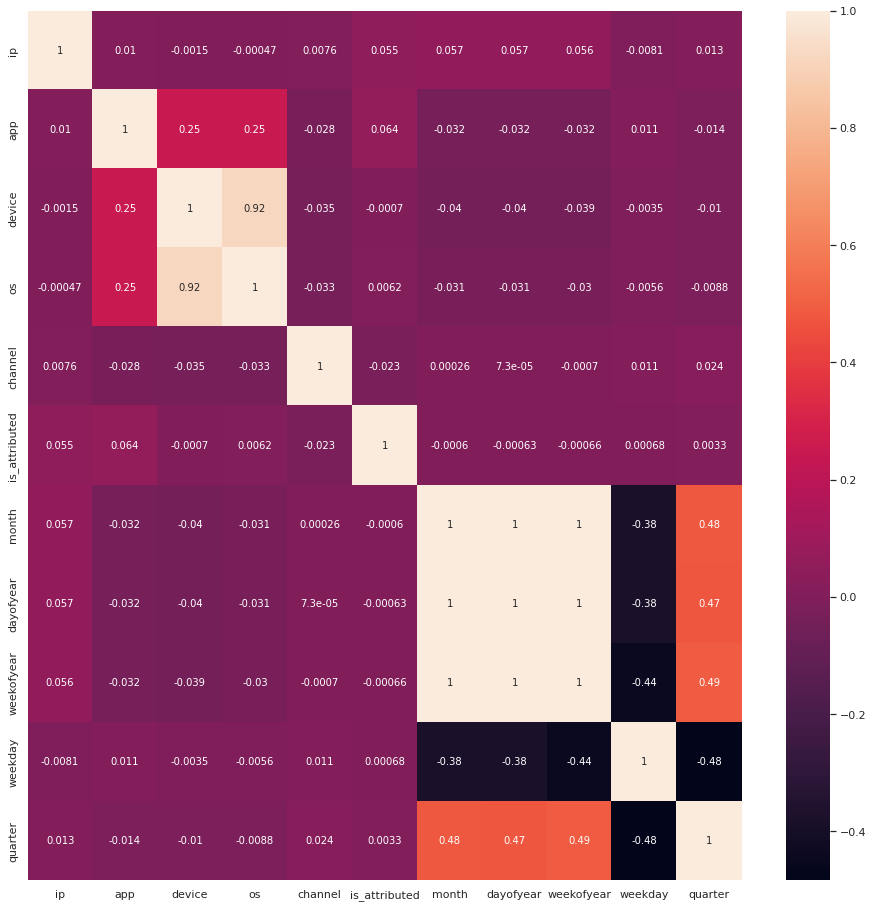

In [14]:
corr = dataset.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True)
plt.show()

#Note: the heat map shows that all features have similar (in range of 0.44 to 0.21) to the dependent variable

**splitting the dataset in to taining and test**

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.2, random_state = 1 )

In [16]:
train_x = train.drop(columns=['is_attributed'])
train_y = train['is_attributed']
test_x = test.drop(columns=['is_attributed'])
test_y = test['is_attributed']

# **model training**

**XGBoostClassifier**

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
print("Accuracy: ", accuracy_score(test_y, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_y, y_pred))
print("Classification Report: ", classification_report(test_y, y_pred))

Accuracy:  0.99785
Confusion Matrix:  [[19952     3]
 [   40     5]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.62      0.11      0.19        45

    accuracy                           1.00     20000
   macro avg       0.81      0.56      0.59     20000
weighted avg       1.00      1.00      1.00     20000



**Gradient Boosting** 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier 
classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05)
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)

In [19]:
print("Accuracy: ", accuracy_score(test_y, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_y, y_pred))
print("Classification Report: ", classification_report(test_y, y_pred))

Accuracy:  0.9976
Confusion Matrix:  [[19946     9]
 [   39     6]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.40      0.13      0.20        45

    accuracy                           1.00     20000
   macro avg       0.70      0.57      0.60     20000
weighted avg       1.00      1.00      1.00     20000



**BaggingClassifier**

In [20]:
classifier = BaggingClassifier()
classifier.fit(train_x, train_y)

prediction = classifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))


Accuracy:  0.99765
Confusion Matrix:  [[19940    15]
 [   32    13]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.46      0.29      0.36        45

    accuracy                           1.00     20000
   macro avg       0.73      0.64      0.68     20000
weighted avg       1.00      1.00      1.00     20000



# **Applying SMOTE**

**XGBoost classifier**

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample (train_x, train_y)
from collections import Counter
print("Before SMOTE: ", Counter(train_y))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 79818, 1: 182})
After SMOTE:  Counter({0: 79818, 1: 79818})


In [34]:
XGclassifier = XGBClassifier()
XGclassifier.fit(x_train_smote, y_train_smote)
y_pred = XGclassifier.predict(test_x)
print("Accuracy: ", accuracy_score(test_y, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_y, y_pred))
print("Classification Report: ", classification_report(test_y, y_pred))

Accuracy:  0.97545
Confusion Matrix:  [[19473   482]
 [    9    36]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     19955
           1       0.07      0.80      0.13        45

    accuracy                           0.98     20000
   macro avg       0.53      0.89      0.56     20000
weighted avg       1.00      0.98      0.99     20000



**Gradient Boost Classifier**

In [35]:
GBclassifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05)
GBclassifier.fit(x_train_smote, y_train_smote)

prediction = GBclassifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))

Accuracy:  0.95775
Confusion Matrix:  [[19116   839]
 [    6    39]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     19955
           1       0.04      0.87      0.08        45

    accuracy                           0.96     20000
   macro avg       0.52      0.91      0.53     20000
weighted avg       1.00      0.96      0.98     20000



**Bagging Classifier**

In [36]:
Bclassifier = BaggingClassifier(n_estimators=10, max_samples=0.7, bootstrap= True)
Bclassifier.fit(x_train_smote, y_train_smote)

prediction = Bclassifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))


Accuracy:  0.99495
Confusion Matrix:  [[19885    70]
 [   31    14]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.17      0.31      0.22        45

    accuracy                           0.99     20000
   macro avg       0.58      0.65      0.61     20000
weighted avg       1.00      0.99      1.00     20000



Comment: SMOTE did improve the accuracy on XGBoostClassifier and Gradient Classifier but not on Bagging Calssifier

# **ROC and AUC**

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob1 = XGclassifier.predict_proba(test_x)
pred_prob2 = Bclassifier.predict_proba(test_x)
fpr1, tpr1, thresh1 = roc_curve(test_y, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_y, pred_prob2[:,1], pos_label=1)
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

auc_score1 = roc_auc_score(test_y, pred_prob1[:,1])
auc_score2 = roc_auc_score(test_y, pred_prob2[:,1])
print(auc_score1, auc_score2)

0.9634137921434338 0.7805445585901613


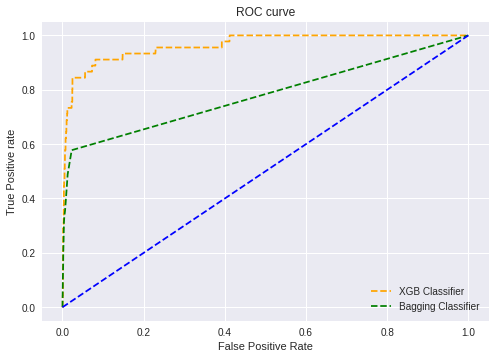

In [40]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Bagging Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();